# Project: Patient Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#observ">Observations</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Data analysis of patients not showing up to their scheduled medical appointments. The data consists of mutliple characteristics that can attribute to a patient showing up to their appointment, or not.

**Data information**

* PatientId = identification of a patient
* AppointmentId = identification of an appointment
* Gender = sex of the patient
* ScheduledDay = day patient calls to schedule an appointment
* AppointmentDay = day patient comes in for scheduled appointment
* Age = age of patient
* Neighbourhood = Location of appointment
* Scholarship = whether a patient is on welfare
* Hipertension = if patient has hypertension. true or false
* Diabetes = if patient has diabetes. true or false
* Alcoholism = if patient is an alcoholic. true or false
* Handcap = if patient has a disability. value is number of disabilities.
* SMS_received = if a patient was reminded of appointment. true or false
* No-show = if a patient showed up for not. yes or no.

**Questions**

Does a patient's ailments (Hypertension, Diabetes, Alcoholism, Disabilities) contribute to the number of no-shows?
If a patient is reminded of their appointment, are they more likely to show up?

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set_context('paper', font_scale = 1.2)

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
df = pd.read_csv('noshowappointment_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There seems to be an instance of min age = -1. Going to explore whether or not this is an intended input or manual error.

In [6]:
df.loc[df['Age'] == -1] #checking if there's multiple instances of Age being -1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Since there is only one instance out of 110527 appointments, this can be considered an input error and will be dropped.

In [7]:
df.duplicated(['PatientId']).sum() #viewing if there are instances of duplicate patients missing appointments

48228

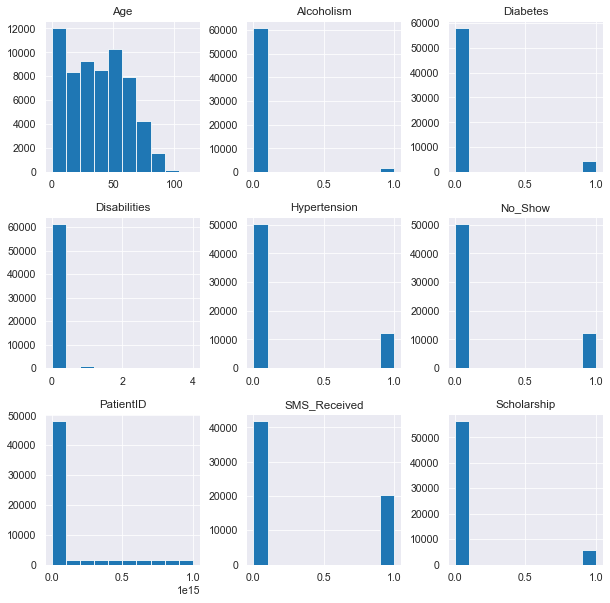

In [264]:
df.hist(figsize=(10, 10));

We can see that most of the patients have no underlying conditions that may influence their attendance. We can also see that majority of the patients range between ages 0-50, then slowly starts to drop down in patient count towards the upper age ranges. Majority of the patients are also not on welfare assistance and can assume that means that a majority of the patients range between middle to upper class. This is relevant because those on welfare may face issues with transportation when it comes to making their appointments.

Most of the patients seem to not have received SMS reminders about their appointments.

<a id='observ'></a>
#### Observations
After wrangling the data for patient appointments, I found that the dataset is clean for the most part except a few unnecessary columns of data that are not usable for the questions I wish to examine. Based on the data, AppointmentID is not needed information. This number will have no bearing on whether or not a patient may show up to their appointment.

I can use PatientId information to gather whether or not there are instances where the same patient is missing multiple appointments, and what may be contributing factors.

Neighbourhood is also not needed as there isn't enough locational data to determine whether or not a patient's location has any factor in predicting a "no-show".

ScheduledDay and AppointmentDay will also be dropped. The data in these columns are missing too many factors to be used as an accurate model for predicting a "no-show". Specifically, the AppointmentDay columns either show the same date as the ScheduledDay, or the AppointmentDay is shown as before the ScheduledDay. AppointmentDay is missing far too much data to even fill for an accurate model.

Dropping duplicate PatientID numbers to isolate non-repeating factors.

Index 99832 will also be dropped as there seems to be only one single occurrence of Age being -1. Since there is only 1 instance of this, this will be considered a manual input error. 

I will also be changing data type of No-show from object (string) to an integer represented by Yes = 1, No = 0. This will allow me to compare data far more easily without having to go through hurdles to visualize the No-show data.

The Hipertension column has a spelling error and will be changed to Hypertension

Renaming SMS_received to SMS_Received for consistency

Renaming Handcap to Disabilities for proper verbage.

Renaming PatientId to PatientID for consistency

Renaming No-show to No_Show for usability
### Data Cleaning

In [265]:
df.drop(['AppointmentID', 'Neighbourhood', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True) #removing unncessary data

KeyError: "['AppointmentID' 'Neighbourhood' 'ScheduledDay' 'AppointmentDay'] not found in axis"

In [266]:
df.drop([99832], inplace=True) #removing index 99832 as it was the only instance of Age = -1

KeyError: '[99832] not found in axis'

In [267]:
df.drop_duplicates(subset='PatientID', inplace=True) #dropping duplicate PatientID

In [268]:
df.head() #verify changes

,PatientID,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Disabilities,SMS_Received,No_Show
0,2.987250e+13,F,62,0,1,0,0,0,0,0
1,5.589978e+14,M,56,0,0,0,0,0,0,0
2,4.262962e+12,F,62,0,0,0,0,0,0,0
3,8.679512e+11,F,8,0,0,0,0,0,0,0
4,8.841186e+12,F,56,0,1,1,0,0,0,0


In [269]:
df.describe() #min age is now 0

,PatientID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Disabilities,SMS_Received,No_Show
count,6.229800e+04,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000
mean,1.471660e+14,36.705496,0.092908,0.196507,0.070885,0.024174,0.020113,0.327362,0.195721
std,2.549080e+14,23.531076,0.290306,0.397360,0.256635,0.153591,0.155058,0.469254,0.396758
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176935e+12,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.198294e+13,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.484763e+13,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [270]:
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Disabilities', 'PatientId':'PatientID', 'SMS_received':'SMS_Received', 'No-show':'No_Show'}, inplace=True) #change column names

In [271]:
df.replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True) #replacing values to integers

In [272]:
df['No_Show'].astype(int) #changing data type from str to int
df['Disabilities'].astype(int)
df.dtypes #confirming change

PatientID       float64
Gender           object
Age               int64
Scholarship       int64
Hypertension      int64
Diabetes          int64
Alcoholism        int64
Disabilities      int64
SMS_Received      int64
No_Show           int64
dtype: object

In [273]:
df.info() #confirming all changes made

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62298 entries, 0 to 110524
Data columns (total 10 columns):
PatientID       62298 non-null float64
Gender          62298 non-null object
Age             62298 non-null int64
Scholarship     62298 non-null int64
Hypertension    62298 non-null int64
Diabetes        62298 non-null int64
Alcoholism      62298 non-null int64
Disabilities    62298 non-null int64
SMS_Received    62298 non-null int64
No_Show         62298 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 5.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Does Hypertension, Diabetes, Alcoholism, and Disabilities Contribute to Number of No-Shows?

In [274]:
#splitting up the data between whether a patient attended their appointment, or not.
attend = df.query('No_Show == 0')
not_attend = df.query('No_Show == 1')

In [275]:
#splitting the data again between attendance and whether they have hypertension or do not.
attend_hyp = attend.query('Hypertension == 1').Hypertension.count()
attend_no_hyp = attend.query('Hypertension == 0').Hypertension.count()
not_attend_hyp = not_attend.query('Hypertension == 1').Hypertension.count()
not_attend_no_hyp = not_attend.query('Hypertension == 0').Hypertension.count()

In [276]:
#split of the attendance data between whether they have diabetes or not
attend_diab = attend.query('Diabetes == 1').Diabetes.count()
attend_no_diab = attend.query('Diabetes == 0').Diabetes.count()
not_attend_diab = not_attend.query('Diabetes == 1').Diabetes.count()
not_attend_no_diab = not_attend.query('Diabetes == 0').Diabetes.count()

In [277]:
#split of the attendance data between whether they are an alcoholic or not
attend_alco = attend.query('Alcoholism == 1').Alcoholism.count()
attend_no_alco = attend.query('Alcoholism == 0').Alcoholism.count()
not_attend_alco = not_attend.query('Alcoholism == 1').Alcoholism.count()
not_attend_no_alco = not_attend.query('Alcoholism == 0').Alcoholism.count()

In [278]:
#split of the attendance data between whether they have a disability or not
attend_disab = attend.query('Disabilities >= 1').Disabilities.count()
attend_no_disab = attend.query('Disabilities == 0').Disabilities.count()
not_attend_disab = not_attend.query('Disabilities >= 1').Disabilities.count()
not_attend_no_disab = not_attend.query('Disabilities == 0').Disabilities.count()

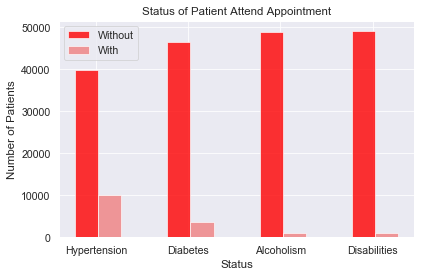

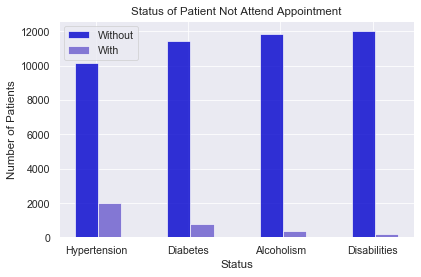

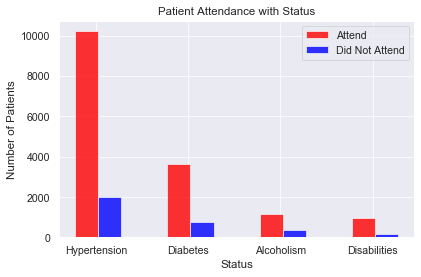

In [279]:
#Did Attend Appointments, with and without status
did_attend_with = [attend_hyp, attend_diab, attend_alco, attend_disab]
did_attend_without = [attend_no_hyp, attend_no_diab, attend_no_alco, attend_no_disab]

fig, ax = plt.subplots()
index = np.arange(len(did_attend_with))
width = .25
opacity = .8

rects1 = plt.bar(index, did_attend_without, width, alpha=opacity, color='red', label='Without')
rects2 = plt.bar(index + width, did_attend_with, width, alpha=opacity, color='lightcoral', label='With')

plt.xlabel('Status')
plt.ylabel('Number of Patients')
plt.title('Status of Patient Attend Appointment')
plt.xticks(index + .1, ('Hypertension', 'Diabetes', 'Alcoholism', 'Disabilities'))
plt.legend()

plt.tight_layout()
plt.show()

#Did Not Attend Appointments, with and without status
did_not_attend_with = [not_attend_hyp, not_attend_diab, not_attend_alco, not_attend_disab]
did_not_attend_without = [not_attend_no_hyp, not_attend_no_diab, not_attend_no_alco, not_attend_no_disab]

rects3 = plt.bar(index, did_not_attend_without, width, alpha=opacity, color='mediumblue', label='Without')
rects4 = plt.bar(index + width, did_not_attend_with, width, alpha=opacity, color='slateblue', label='With')

plt.xlabel('Status')
plt.ylabel('Number of Patients')
plt.title('Status of Patient Not Attend Appointment')
plt.xticks(index + .1, ('Hypertension', 'Diabetes', 'Alcoholism', 'Disabilities'))
plt.legend()

plt.tight_layout()
plt.show()

#Patient with status vs Patient without
rect5 = plt.bar(index, did_attend_with, width, alpha=opacity, color='r', label='Attend')
rect6 = plt.bar(index + width, did_not_attend_with, width, alpha=opacity, color='b', label='Did Not Attend')

plt.xlabel('Status')
plt.ylabel('Number of Patients')
plt.title('Patient Attendance with Status')
plt.xticks(index + .1, ('Hypertension', 'Diabetes', 'Alcoholism', 'Disabilities'))
plt.legend()

plt.tight_layout()
plt.show()

As we can see from the comparison above between patients that showed up to their appointments and patients that did not show up to their appointments, we are able to see that the status of the patient had no bearing on whether or not a patient attended their appointment. Even with a closer look in comparing all patients with a status, there's no real correlation of a patient's status influencing their attendance.

### If a patient is reminded of their appointment, are they more likely to show up?

In [280]:
#split of the attendance data between whether they received an SMS reminder or not
sms_attend = attend.query('SMS_Received == 1').SMS_Received.count()
no_sms_attend = attend.query('SMS_Received == 0').SMS_Received.count()
sms_not_attend = not_attend.query('SMS_Received == 1').SMS_Received.count()
no_sms_not_attend = not_attend.query('SMS_Received == 0').SMS_Received.count()

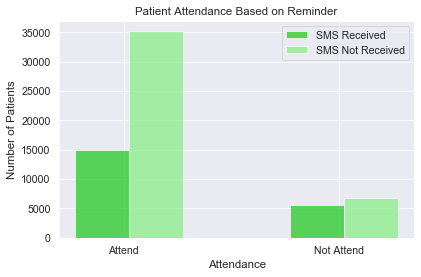

In [281]:
#patient attendance based on if the patient received an sms reminder or not
sms_received = [sms_attend, sms_not_attend]
sms_not_received = [no_sms_attend, no_sms_not_attend]

fig, ax = plt.subplots()
index = np.arange(len(sms_received))
width = .25
opacity = .8

rects1 = plt.bar(index, sms_received, width, alpha=opacity, color='limegreen', label='SMS Received')
rects2 = plt.bar(index + width, sms_not_received, width, alpha=opacity, color='lightgreen', label='SMS Not Received')

plt.xlabel('Attendance')
plt.ylabel('Number of Patients')
plt.title('Patient Attendance Based on Reminder')
plt.xticks(index + .1, ('Attend', 'Not Attend'))
plt.legend()

plt.tight_layout()
plt.show()

The data comparison above show there may be more factors involved when determining whether a patient will show up to their appointment or not. A very large portion of the patients that did attend their appointments, did not receive an SMS reminder. However, we are able to determine based on the given data, if a patient does not attend their appointment, it is most likely because they did not receive an sms reminder.

<a id='conclusions'></a>
## Conclusions


When exploring the question of what may influence a patient missing their appointment, we are able to see that the status (hypertension, diabetes, alcoholism, or disabilities) of a patient has no real influence on their attendance. When looking at the possibility of reminders influencing the attendance of a patient, there is still very little correlation in patient attendance. However, when looking at just the data for patients that did not attend their appointment with or without an sms reminder, we can see that more patients did not receive an sms reminder than those that did. This can be considered a slight correlation, but still may not be enough of a gap to completely say that there is a causation. This could be explored more if there was more complete data on the "ScheduledDay" and "AppointmentDay" columns. However, due to how much information was missing from the "AppointmentDay" column, this data had to be considered irrelevant. 